# Data Filtering via Constraints

In [1]:
import pandas as pd

try:
    df = pd.read_csv('merged_data.csv', encoding='utf-8')
except pd.errors.ParserError as e:
    print("ParserError:", e)
except FileNotFoundError:
    print("File not found. Please double-check the file path.")

df.head(5)

File not found. Please double-check the file path.


NameError: name 'df' is not defined

In [ ]:
df.dtypes

NLSituationNumber           int64
DateFileStart              object
DateFileEnd                object
TimeFileStart              object
TimeFileEnd                object
FileSeverity               object
AvgLength                  object
FileDuration               object
HectometerHead             object
HectometerTail             object
RouteLet                   object
RouteNum                    int64
RouteOms                   object
hectometreringsrichting    object
KopWegvakVan               object
KopWegvakNaar              object
TrajectoryFrom             object
TrajectoryTo               object
CauseGroundDetail          object
CauseProgress              object
CauseCodeProgress          object
CauseCode                  object
Cause1                     object
Cause2                     object
Cause3                     object
Cause4                     object
datetime_x                 object
hour                       object
STN                         int64
Date          

In [ ]:
# Convert relevant columns to datetime
df['DateFileStart'] = pd.to_datetime(df['DateFileStart'])
df['DateFileEnd'] = pd.to_datetime(df['DateFileEnd'])

C:\Users\erend\AppData\Local\Temp\ipykernel_27284\3281080743.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DateFileEnd'] = pd.to_datetime(df['DateFileEnd'])


In [ ]:
import datetime as dt

def convert_to_time(time_value):
    if isinstance(time_value, dt.time):
        return time_value
    try:
        return dt.datetime.strptime(time_value, '%H:%M:%S').time()
    except (ValueError, TypeError):
        return None

# Apply the function to convert TimeFileStart and TimeFileEnd
df['TimeFileStart'] = df['TimeFileStart'].apply(convert_to_time)
df['TimeFileEnd'] = df['TimeFileEnd'].apply(convert_to_time)

print(df[['TimeFileStart', 'TimeFileEnd']].head())

  TimeFileStart TimeFileEnd
0      16:54:29    17:00:06
1      16:54:29    17:00:06
2      16:54:29    17:00:06
3      16:54:29    17:00:06
4      16:54:29    16:56:05


### Excluding Public Holidays and Weekends

In [ ]:
public_holidays = [
    '2019-01-01', '2019-04-19', '2019-04-21', '2019-04-22', '2019-04-27',
    '2019-05-05', '2019-05-30', '2019-06-09', '2019-06-10', '2019-12-25', '2019-12-26',
    '2020-01-01', '2020-04-10', '2020-04-12', '2020-04-13', '2020-04-27', '2020-05-05',
    '2020-05-21', '2020-05-31', '2020-06-01', '2020-12-25', '2020-12-26',
    '2021-01-01', '2021-04-02', '2021-04-04', '2021-04-05', '2021-04-27', '2021-05-05',
    '2021-05-13', '2021-05-23', '2021-05-24', '2021-12-25', '2021-12-26',
    '2022-01-01', '2022-04-15', '2022-04-17', '2022-04-18', '2022-04-27', '2022-05-05',
    '2022-05-26', '2022-06-05', '2022-06-06', '2022-12-25', '2022-12-26',
    '2023-01-01', '2023-04-07', '2023-04-09', '2023-04-10', '2023-04-27', '2023-05-05',
    '2023-05-18', '2023-05-28', '2023-05-29', '2023-12-25', '2023-12-26',
    '2024-01-01', '2024-03-29', '2024-03-31', '2024-04-01', '2024-04-27', '2024-05-05',
    '2024-05-09', '2024-05-19', '2024-05-20', '2024-12-25', '2024-12-26'
]

public_holidays = pd.to_datetime(public_holidays)

In [ ]:
# Define working hours constraints
morning_start = dt.time(8, 30)      # 08:30 AM
morning_end = dt.time(9, 0)         # 09:00 AM
afternoon_start = dt.time(14, 0)    # 02:00 PM

# Minimum and Maximum day start and end
earliest_start = dt.time(7, 30)  # 07:30 AM
latest_end = dt.time(18, 30)     # 06:30 PM

- Records corresponding to weekends (Saturdays and Sundays) were removed. This was done by checking the day of the week for DateFileStart and excluding records where the day was either 5 (Saturday) or 6 (Sunday).
- A list of public holidays from 2019 to 2024 was created and converted to datetime format.
Records corresponding to these public holidays were removed by checking if DateFileStart matched any date in the public holidays list.

In [ ]:
# Make a copy of the dataset
df_copy = df.copy()

# Filter out weekends
df_copy = df_copy[~df_copy['DateFileStart'].dt.dayofweek.isin([5, 6])]

# Filter out public holidays
df_copy = df_copy[~df_copy['DateFileStart'].isin(public_holidays)]

In [ ]:
# Filter records based on the specified working hours constraints and day start and end constraints
df_copy = df_copy[((df_copy['TimeFileStart'] >= morning_start) & (df_copy['TimeFileStart'] <= morning_end)) | 
                  (df_copy['TimeFileStart'] >= afternoon_start)]

df_copy = df_copy[(df_copy['TimeFileStart'] >= earliest_start) & (df_copy['TimeFileEnd'] <= latest_end)]


`Earliest Start Time:`:
- The condition (df_copy['TimeFileStart'] >= earliest_start) ensures that no records start before 7:30 AM.

`Latest End Time`:
- The condition (df_copy['TimeFileEnd'] <= latest_end) ensures that no records end after 6:30 PM.

`Combining Conditions`:
- The two conditions are combined using the OR operator |. This ensures that a record is included if it satisfies either the morning window condition or the afternoon window condition.
- Start and end time conditions are applied in conjunction with the previously defined working hours constraints to ensure all constraints are respected.

Spitsfile (geen oorzaak gemeld)                                479020
File buiten spits (geen oorzaak gemeld)                         21028
Spitsfile (geen oorzaak gemeld) met gevonden werk in Spin       12828
Ongeval(len)                                                     6644
Defecte vrachtwagen(s)                                           2156
Defect(e) voertuig(en)                                           1860
Ongeval (met opruim/berging)                                     1392
Afremmend verkeer als gevolg van kijkers naar  ongeval(len)       584
Ongeval met vrachtwagen(s)                                        516
Spitsfile (met ongeval)                                           472
Ongeval op aansluitende weg                                       468
Ongeval (in een spitsfile)                                        416
Eerder(e) ongeval(len)                                            368
Defect voertuig (met opruim/berging)                              316
Voorwerpen op de weg

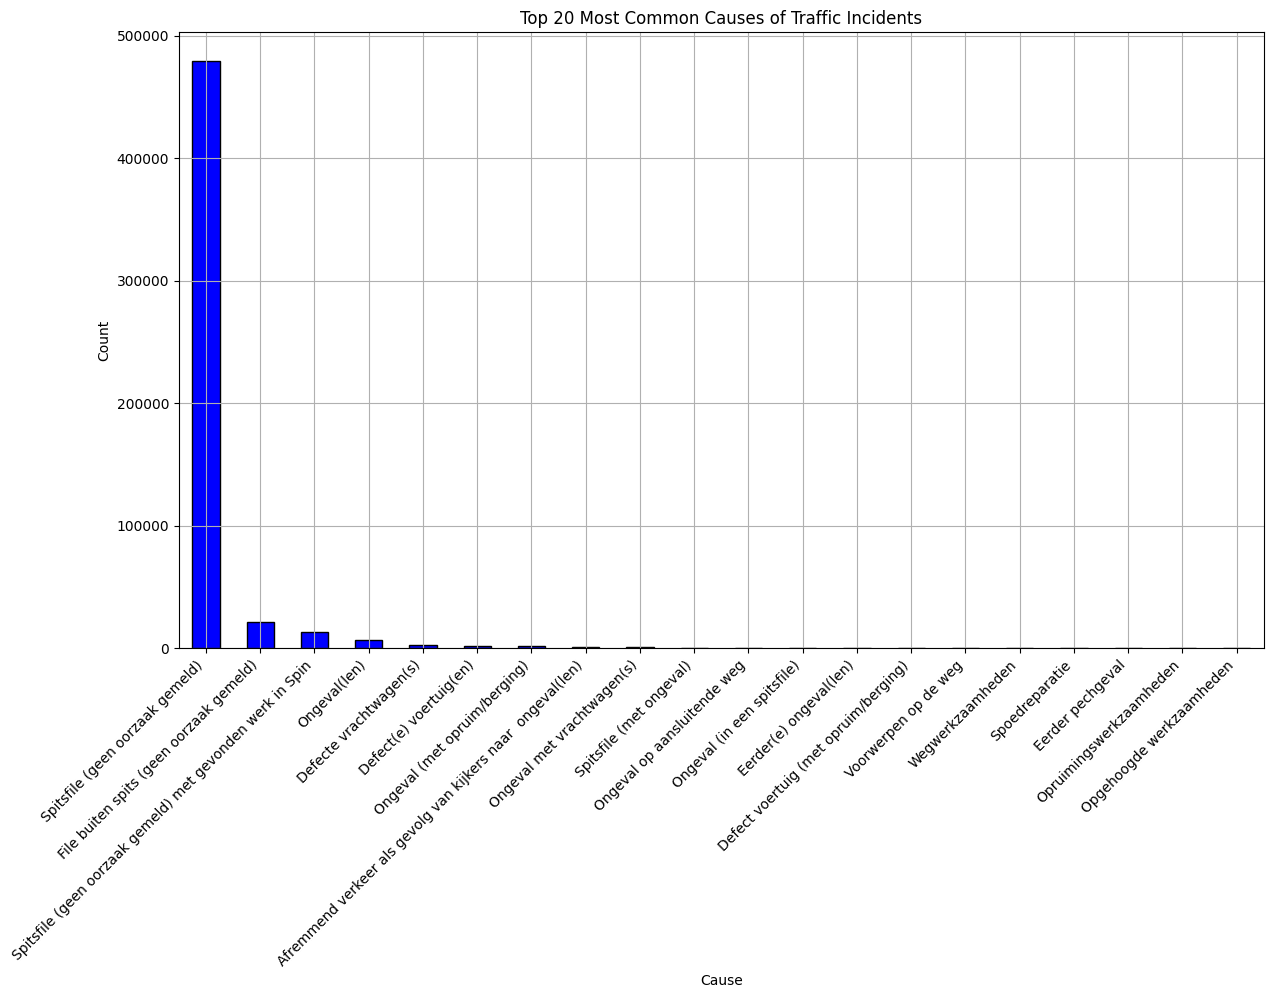

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each cause in CauseGroundDetail
top_20_causes = df_copy['CauseGroundDetail'].value_counts().head(20)
print(top_20_causes)

# Plot the top 20 most common causes
plt.figure(figsize=(14, 8))
top_20_causes.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Top 20 Most Common Causes of Traffic Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#Rush hour traffic jam (no cause reported)
#Traffic jam outside rush hour (no cause reported)
#Rush hour traffic jam (no cause reported) with work found in Spin

In [ ]:
cause_mapping = {
    'Accidents': [
        'Ongeval(len)', 'Ongeval (in een spitsfile)', 'Ongeval op aansluitende weg', 'Ongeval (en daarna defect voertuig)',
        'Ongeval met vrachtwagen(s)', 'Ongeval (met opruim/berging)', 'Ongeval op aansluitende weg (en incident op aansluitende weg)',
        'Ongeval (met incident op aanslutiende weg)', 'Ongeval en (file buiten spits zonder oorzaak)', 'Ongeval (met opruim / berging en ongeval op aansluitende weg)',
        'Ongeval (met object op de weg)', 'Ongeval vrachtwagen (met opruim/berging)', 'Ongeval op aansluitende weg (met spitsfile)',
        'Ongeval op stedelijke weg', 'Ongeval vrachtwagen (in een spitsfile)', 'Ongeval (met ander incident)', 'Ongeval vrachtwagen (met defecte vrachtwagen)',
        'Ongeval op provinciale weg', 'Ongeval (met ongeval op aanslutiende weg)', 'Ongeval (en daarna werkzaamheden)', 'Ongeval (met spoedreparatie)',
        'Ongeval (met schade RWS)', 'Ongevalsonderzoek', 'Ongeval (en weersomstandigheden)', 'Ongeval (met opruim/berging) (en defecte vrachtwagen)',
        'Ongeval (met file op omleidingsroute)', 'Ongeval vrachtwagen (met spoedreparatie)', 'Spitsfile (met ongeval)',  'Spitsfile (met ongeval op aansluitende weg)',
        'Spitsfile (met ongeval vrachtauto)', 'Spitsfile (met incident op aansluitende weg)', 'Spitsfile (met ongeval vrachtwagen)', 'Spitsfile (met ongeval en ongeval op aansluitende weg)',
        'Afremmend verkeer als gevolg van kijkers naar ongeval(len)', 'Incident (ongeval vrachtwagen) en incident (defect voertuig)', 'Eerder ongeval op aansluitende weg', 
        'Extra verkeersdrukte door verkeer dat een omleiding volgt', 'Incident op stedelijke weg', 'Eerder(e) ongeval(len)', 'Geschaarde aanhanger(s)', 
        'Onwelwording', 'Incident op provinciale weg', 'Eerder incident op aansluitende weg', 'Incident op andere rijrichting', 
        'Spitsfile (en schade RWS)', 'File op omleidingsroute (en file zonder oorzaak)'
    ],
    'Defective Vehicles': [
        'Defecte vrachtwagen(s)', 'Defect(e) voertuig(en)', 'Defect voertuig (met opruim/berging)', 'Defect voertuig (met spoedreparatie)',
        'Defect voertuig (object op de weg)', 'Defect voertuig (met spitsfile)', 'Defecte vrachtwagen (met ongeval)', 'Defecte vrachtwagen (met opruim/berging)',
        'Defecte vrachtwagen (in een spitsfile)', 'Defecte vrachtwagen (object op de weg)', 'Defecte bus(sen)', 'Defecte vrachtwagen (en files buiten spits zonder oorzaak)',
        'Defecte vrachtwagen (met ongeval en opruim/berging)', 'Defecte vrachtwagen (en object op de weg in een spitsfile)', 'Defect voertuig (en daarna ongeval)',
        'Defect voertuig (en ander incident)', 'Spitsfile (defect voertuig en berging)',  'Spitsfile (met defect voertuig)', 'Langza(a)m(e) voertuig(en)'
    ],
    'Maintenance Work': [
        'Opgehoogde werkzaamheden', 'Wegwerkzaamheden', 'Opruimingswerkzaamheden', 'Opruimwerkzaamheden', 'Opruim/bergingswerkzaamheden (in een spitsfile)',
        'Spoedreparatie', 'Schade aan wegmeubilair', 'Olie op het wegdek', 'Modder op het wegdek', 'Werkzaamheden in de berm', 'Werkzaamheden op aansluitende weg',
        'Werkzaamheden (en file buiten spits zonder oorzaak)', 'Werkzaamheden (in een spitsfile)', 'Verzakkingen', 'Werkzaamheden op stedelijke weg',  'Spitsfile (en spoedreparatie)',
        'File buiten spits zonder oorzaak (met werkzaamheden)', 'Extra verkeersdrukte door werkzaamheden elders', 'Water op de weg', 'Ophoogscript',
        'Verkeerslichten buiten werking', 'Er wordt zout gestrooid'
    ],
    'Weather': [
        'Bermbrand', 'Sneeuwval', 'Onweersbuien', 'Winterse buien', 'Regenval', 'Mist', 'Falen DVM (en spitsfile)', 'Technische storing'
    ],
    'Obstacles': [
        'Voorwerpen op de weg', 'Dieren op de weg', 'Omgewaaide bo(o)m(en)', 'Object op de weg (met opruim/berging)', 'Er ligt rommel op de weg',
        'Gekanteld(e) voertuig(en)', 'Spitsstrook aan de rechterzijde gesloten', 'Beschadigde geleiderail', 'Gekanteld(e) vrachtwagen(s)', 'Afgevallen lading(en)',
        'Tunnel gesloten', 'Gladde weg', 'Te hoog voertuig gesignaleerd, wordt afgehandeld', 'Spitsstrook aan de linkerzijde gesloten', 'Spitsfile (met object op de weg)',
        'Mensen op de weg', 'Spookrijder(s)'
    ],
    'Emergency and Police': [
        'Politieactie', 'Politieonderzoek', 'Spoedtransport', 'Betoging',  'Brand in de buurt van de weg', 'Rijstrook voor hulpdiensten afgesloten',
        'Incident (met opruim/berging)', 'Rijstrook voor hulpdiensten afgesloten'
    ],
    'Events and Traffic Volume': [
        'Evenementen (en files buiten spits zonder oorzaak)', 'Recreatie- en vakantieverkeer'
    ]
}

#'Spitsfile (geen oorzaak gemeld)' --> Other
#'File buiten spits (geen oorzaak gemeld)' --> Other

# Reverse the mapping to have cause as key and category as value
reverse_cause_mapping = {cause.replace(' ', ''): category for category, causes in cause_mapping.items() for cause in causes}

# Strip any leading/trailing spaces and remove all spaces from the CauseGroundDetail values
df_copy['CauseGroundDetail'] = df_copy['CauseGroundDetail'].str.strip().str.replace(' ', '', regex=False)

# Exclude specified causes
excluded_causes = ['Spitsfile (geen oorzaak gemeld)', 'File buiten spits (geen oorzaak gemeld)']
excluded_causes_stripped = [cause.replace(' ', '') for cause in excluded_causes]
df_copy = df_copy[~df_copy['CauseGroundDetail'].isin(excluded_causes_stripped)]

# Map the causes to their categories
df_copy['CauseGroundDetail'] = df_copy['CauseGroundDetail'].map(reverse_cause_mapping)

# # Replace NaNs with 'Other'
# df_copy['CauseGroundDetail'] = df_copy['CauseGroundDetail'].fillna('Other')
# Drop rows with NaN values in 'CauseGroundDetail'
df_copy = df_copy.dropna(subset=['CauseGroundDetail'])

# Display the count of each category
category_counts = df_copy['CauseGroundDetail'].value_counts()
print(category_counts)
# print(df_copy['CauseGroundDetail'].sample(20))

Accidents                    11976
Defective Vehicles            5008
Maintenance Work              1368
Obstacles                      592
Weather                        260
Emergency and Police           172
Events and Traffic Volume       24
Name: CauseGroundDetail, dtype: int64


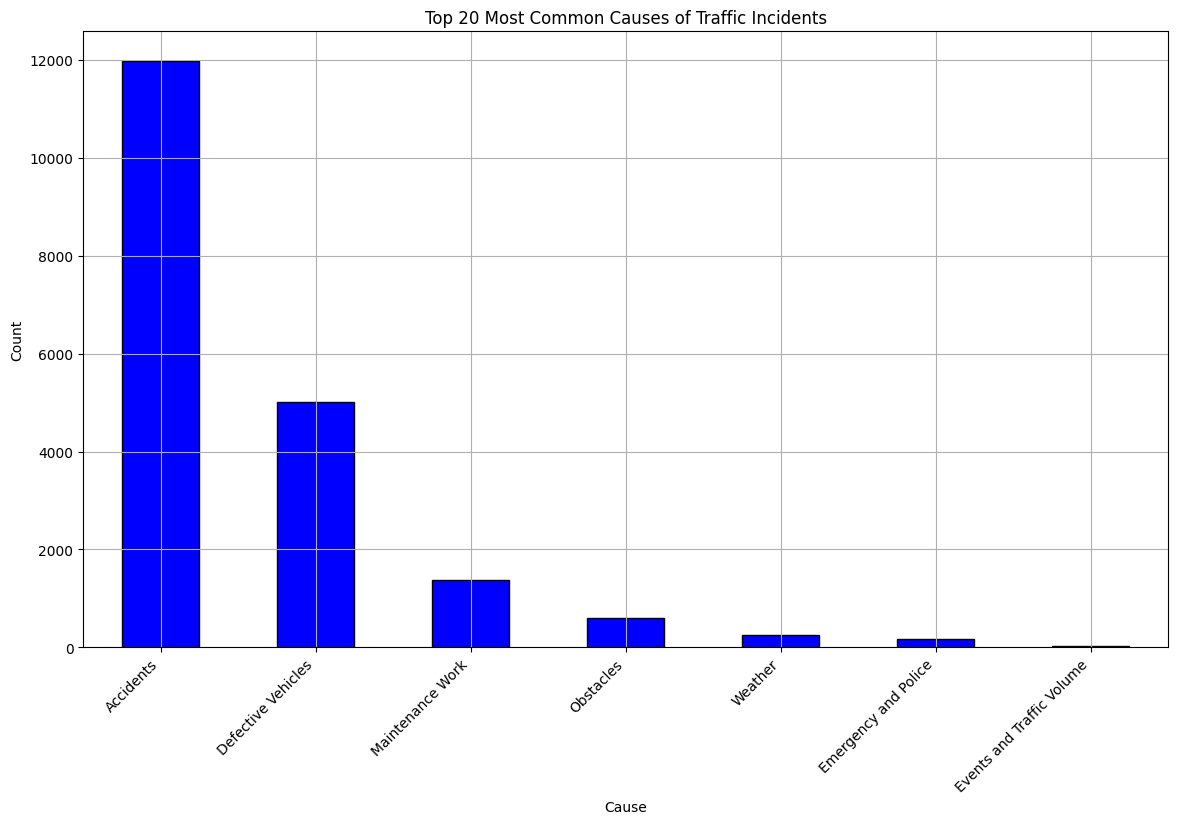

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each cause within the categorized data
cause_counts = df_copy['CauseGroundDetail'].value_counts()

# Plot the top 20 most common causes
plt.figure(figsize=(14, 8))
cause_counts.head(20).plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.title('Top 20 Most Common Causes of Traffic Incidents')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [ ]:
# Save the filtered dataset to a CSV file
filtered_file_path = 'filtered_categorized_merged_data.csv'
df_copy.to_csv(filtered_file_path, index=False)

## Feature Engineering

### Loading the Filtered Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = pd.read_csv('filtered_categorized_merged_data.csv')

df_filtered.head(5)

/var/folders/v0/xnj1kfbn0yj_ct6kts8mhvlm0000gn/T/ipykernel_42173/2003296380.py:4: DtypeWarning: Columns (43,44,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv('filtered_categorized_merged_data.csv')


,NLSituationNumber,DateFileStart,DateFileEnd,TimeFileStart,TimeFileEnd,FileSeverity,AvgLength,FileDuration,HectometerHead,HectometerTail,...,CloudCover,Humidity,Weather,WeatherCode,Fog,Rain,Snow,Thunder,IceFormation,datetime_y
0,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,28,,5,0,0,0,0,0,2023-06-14 14:00:00
1,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,25,,5,0,0,0,0,0,2023-06-14 14:00:00
2,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,27,,5,0,0,0,0,0,2023-06-14 14:00:00
3,3590923,2023-06-14,2023-06-14,14:34:28,14:37:00,"5,922","2,338,000","2,533","60,5","58,2",...,0,29,,5,0,0,0,0,0,2023-06-14 14:00:00
4,3591484,2023-06-14,2023-06-14,16:21:29,17:59:14,"746,553","7,637,000","97,750","61,3","58,0",...,0,31,,5,0,0,0,0,0,2023-06-14 16:00:00


1. Traffic Severity Impact:
    - Normalized traffic severity.

2. Weather Conditions Impact:
    - Binary indicators for adverse weather conditions (fog, rain, snow, thunder, ice formation).

In [4]:
# Inspect unique values in the AvgLength column
unique_avg_length = df_filtered['AvgLength'].unique()
print("Unique values in AvgLength:", unique_avg_length)

Unique values in AvgLength: ['2,338,000' '7,637,000' '4,476,000' ... '2,872,217' '2,549,977'
 '2,433,484']


In [5]:
# Function to clean and normalize FileSeverity
def clean_and_normalize_fileseverity(column):
    # Remove thousands separator and replace decimal separator
    column = column.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    # Convert to numeric
    column = pd.to_numeric(column, errors='coerce')
    # Normalize the column
    column_normalized = column / column.max()
    return column_normalized

In [6]:
# Clean and normalize FileSeverity
df_filtered['TrafficSeverityNormalized'] = clean_and_normalize_fileseverity(df_filtered['FileSeverity'].astype(str))

# Display the first few rows to verify
print(df_filtered[['FileSeverity', 'TrafficSeverityNormalized']].head())

  FileSeverity  TrafficSeverityNormalized
0        5,922                   0.005922
1        5,922                   0.005922
2        5,922                   0.005922
3        5,922                   0.005922
4      746,553                   0.746590


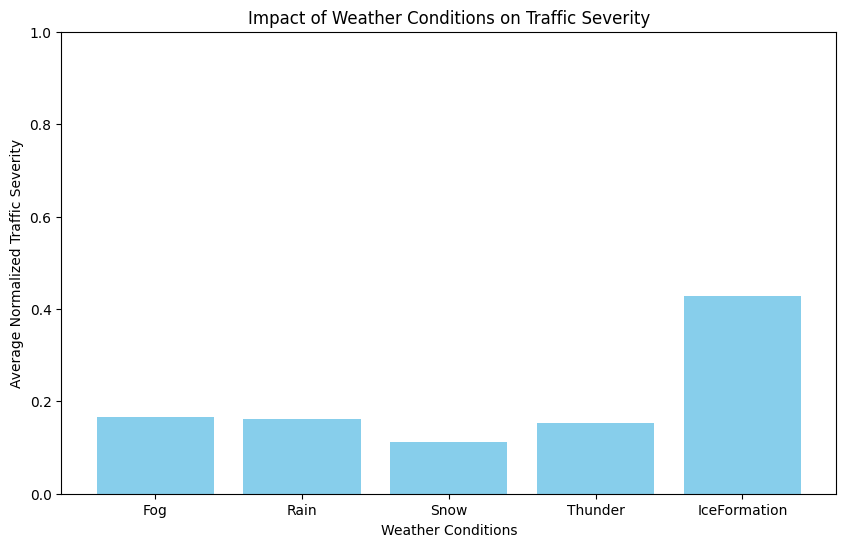

In [7]:
# List of potential weather condition columns (adjust based on your dataset)
weather_conditions = ['Fog','Rain', 'Snow', 'Thunder', 'IceFormation']

# Calculate the average traffic severity for each weather condition
average_severity = {condition: df_filtered[df_filtered[condition] == 1]['TrafficSeverityNormalized'].mean() for condition in weather_conditions}

# Convert to DataFrame for easier plotting
severity_df = pd.DataFrame(list(average_severity.items()), columns=['WeatherCondition', 'AverageSeverity'])

# Plot the impact of weather conditions on traffic severity
plt.figure(figsize=(10, 6))
plt.bar(severity_df['WeatherCondition'], severity_df['AverageSeverity'], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Normalized Traffic Severity')
plt.title('Impact of Weather Conditions on Traffic Severity')
plt.ylim(0, 1)  # Normalized severity ranges from 0 to 1
plt.show()

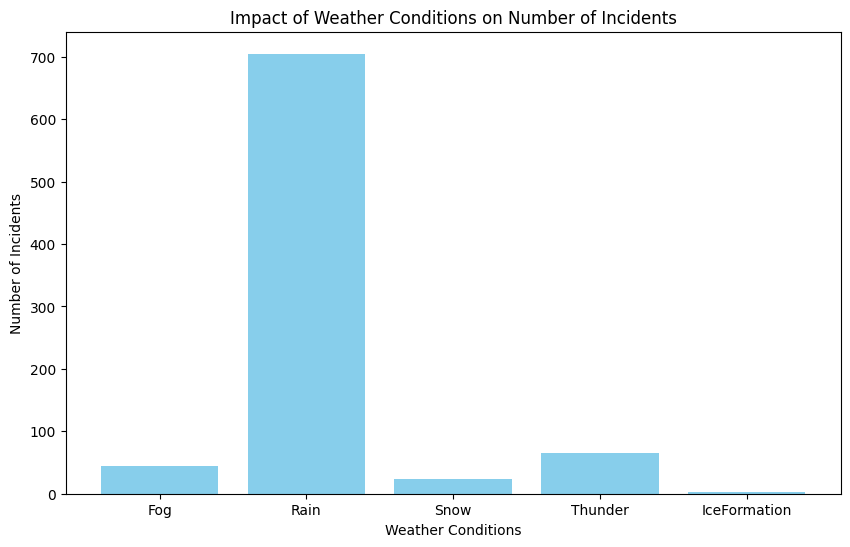

In [8]:
weather_conditions = ['Fog','Rain', 'Snow', 'Thunder', 'IceFormation']

# Calculate the number of incidents for each weather condition
incident_counts = {condition: df_filtered[df_filtered[condition] == 1].shape[0] for condition in weather_conditions}

# Convert to DataFrame for easier plotting
incident_counts_df = pd.DataFrame(list(incident_counts.items()), columns=['WeatherCondition', 'IncidentCount'])

# Plot the impact of weather conditions on number of incidents
plt.figure(figsize=(10, 6))
plt.bar(incident_counts_df['WeatherCondition'], incident_counts_df['IncidentCount'], color='skyblue')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')
plt.title('Impact of Weather Conditions on Number of Incidents')
plt.show()

In [9]:
# List of potential weather condition columns (adjust based on your dataset)
weather_conditions = ['Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation']

# Convert weather condition columns to numeric
for condition in weather_conditions:
    df_filtered[condition] = pd.to_numeric(df_filtered[condition], errors='coerce')


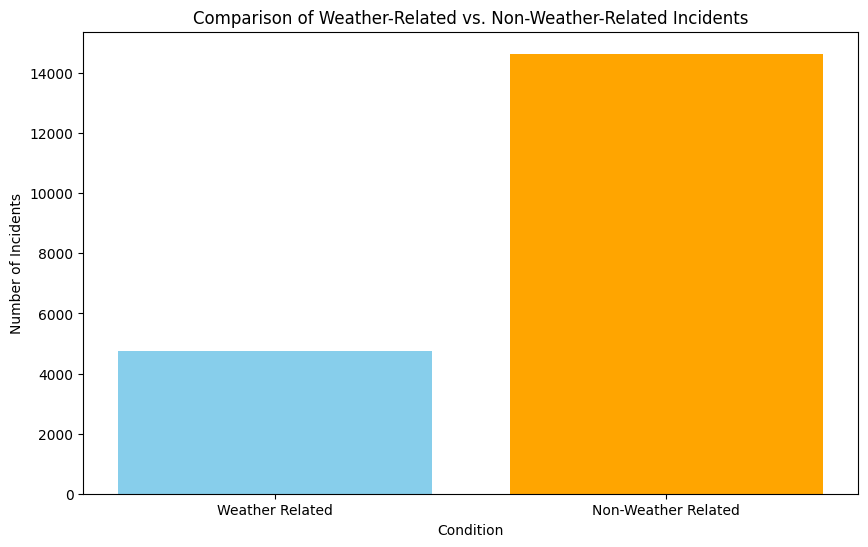

             Condition  IncidentCount
0      Weather Related           4757
1  Non-Weather Related          14643


In [10]:
# Calculate the number of incidents related to weather
weather_related_incidents = df_filtered[df_filtered[weather_conditions].sum(axis=1) > 0].shape[0]

# Calculate the number of incidents not related to weather
non_weather_related_incidents = df_filtered[df_filtered[weather_conditions].sum(axis=1) == 0].shape[0]

# Create a DataFrame for plotting
incident_comparison_df = pd.DataFrame({
    'Condition': ['Weather Related', 'Non-Weather Related'],
    'IncidentCount': [weather_related_incidents, non_weather_related_incidents]
})

# Plot the comparison of incidents related to weather vs. not related to weather
plt.figure(figsize=(10, 6))
plt.bar(incident_comparison_df['Condition'], incident_comparison_df['IncidentCount'], color=['skyblue', 'orange'])
plt.xlabel('Condition')
plt.ylabel('Number of Incidents')
plt.title('Comparison of Weather-Related vs. Non-Weather-Related Incidents')
plt.show()

# Display the incident comparison counts
print(incident_comparison_df)

In [11]:
# List of potential weather condition columns (adjust based on your dataset)
weather_conditions = ['Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation']

# Convert weather condition columns to numeric
for condition in weather_conditions:
    df_filtered[condition] = pd.to_numeric(df_filtered[condition], errors='coerce')

# Create a column to indicate weather-related incidents
df_filtered['WeatherRelated'] = df_filtered[weather_conditions].sum(axis=1) > 0

# Create a column to indicate non-weather-related incidents
df_filtered['NonWeatherRelated'] = df_filtered['WeatherRelated'] == False

# Ensure Date column is in datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Display the first few rows to verify
print(df_filtered[['Date', 'WeatherRelated', 'NonWeatherRelated']].sample(10))

            Date  WeatherRelated  NonWeatherRelated
8215  2019-11-13            True              False
14257 2022-02-10            True              False
10809 2019-09-03           False               True
435   2023-06-21           False               True
4014  2022-10-24            True              False
17250 2020-08-17           False               True
5756  2023-12-08           False               True
11402 2020-01-16           False               True
5534  2023-07-07           False               True
16041 2020-03-31           False               True


In [12]:
# Ensure Date column is in datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Sort by Date
df_filtered = df_filtered.sort_values(by='Date')

# Create time shifts to analyze temporal relationships
df_filtered['PrevWeatherRelated'] = df_filtered['WeatherRelated'].shift(1)
df_filtered['NextNonWeatherRelated'] = df_filtered['NonWeatherRelated'].shift(-1)

# Analyze the relationship
temporal_analysis = df_filtered[(df_filtered['PrevWeatherRelated'] == True) & (df_filtered['NextNonWeatherRelated'] == True)]

# Display the results
print(temporal_analysis[['Date', 'WeatherRelated', 'NonWeatherRelated', 'PrevWeatherRelated', 'NextNonWeatherRelated']])

            Date  WeatherRelated  NonWeatherRelated PrevWeatherRelated  \
13809 2019-01-03           False               True               True   
13757 2019-01-03           False               True               True   
13780 2019-01-04            True              False               True   
13763 2019-01-04           False               True               True   
13781 2019-01-04           False               True               True   
...          ...             ...                ...                ...   
5194  2024-02-23           False               True               True   
5147  2024-02-26            True              False               True   
5121  2024-02-27           False               True               True   
5117  2024-02-28            True              False               True   
5116  2024-02-28           False               True               True   

      NextNonWeatherRelated  
13809                  True  
13757                  True  
13780                

In [13]:
# Group by date and count incidents
daily_incidents = df_filtered.groupby(df_filtered['Date'].dt.date).agg({
    'WeatherRelated': 'sum',
    'NonWeatherRelated': 'sum'
}).reset_index()

# Calculate correlation
correlation_matrix = daily_incidents[['WeatherRelated', 'NonWeatherRelated']].corr()

# Display the correlation matrix
print(correlation_matrix)

                   WeatherRelated  NonWeatherRelated
WeatherRelated           1.000000          -0.332622
NonWeatherRelated       -0.332622           1.000000


In [14]:
# Convert datetime columns to datetime format
df_filtered['DateFileStart'] = pd.to_datetime(df_filtered['DateFileStart'])
df_filtered['DateFileEnd'] = pd.to_datetime(df_filtered['DateFileEnd'])
df_filtered['datetime_y'] = pd.to_datetime(df_filtered['datetime_y'])

# Display the first few rows to verify
print(df_filtered[['DateFileStart', 'DateFileEnd', 'datetime_y']].head())

      DateFileStart DateFileEnd          datetime_y
13773    2019-01-03  2019-03-01 2019-01-03 16:00:00
13774    2019-01-03  2019-03-01 2019-01-03 16:00:00
13775    2019-01-03  2019-03-01 2019-01-03 16:00:00
13808    2019-01-03  2019-03-01 2019-01-03 17:00:00
13809    2019-01-03  2019-03-01 2019-01-03 17:00:00


In [15]:
# Function to check if times overlap
def check_time_overlap(row):
    incident_start = row['DateFileStart']
    incident_end = row['DateFileEnd']
    weather_time = row['datetime_y']
    
    # Check if the incident time overlaps with the weather time
    return (incident_start <= weather_time) and (weather_time <= incident_end)

# Apply the function to determine if an incident is weather-related
df_filtered['WeatherRelated'] = df_filtered.apply(lambda row: check_time_overlap(row) and any(row[condition] > 0 for condition in ['Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation']), axis=1)

# Create a column to indicate non-weather-related incidents
df_filtered['NonWeatherRelated'] = ~df_filtered['WeatherRelated']

# Display the first few rows to verify
print(df_filtered[['DateFileStart', 'DateFileEnd', 'datetime_y', 'WeatherRelated', 'NonWeatherRelated']].head())

      DateFileStart DateFileEnd          datetime_y  WeatherRelated  \
13773    2019-01-03  2019-03-01 2019-01-03 16:00:00           False   
13774    2019-01-03  2019-03-01 2019-01-03 16:00:00           False   
13775    2019-01-03  2019-03-01 2019-01-03 16:00:00           False   
13808    2019-01-03  2019-03-01 2019-01-03 17:00:00            True   
13809    2019-01-03  2019-03-01 2019-01-03 17:00:00           False   

       NonWeatherRelated  
13773               True  
13774               True  
13775               True  
13808              False  
13809               True  


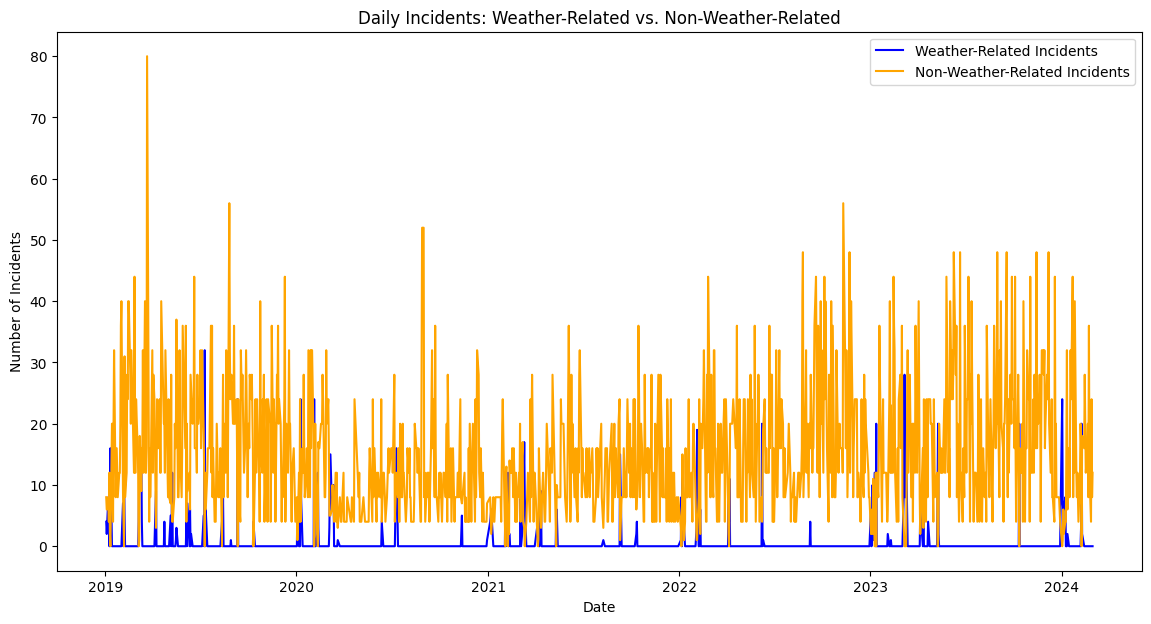

In [16]:
# Group by date and count incidents
daily_incidents = df_filtered.groupby(df_filtered['DateFileStart'].dt.date).agg({
    'WeatherRelated': 'sum',
    'NonWeatherRelated': 'sum'
}).reset_index()

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(daily_incidents['DateFileStart'], daily_incidents['WeatherRelated'], label='Weather-Related Incidents', color='blue')
plt.plot(daily_incidents['DateFileStart'], daily_incidents['NonWeatherRelated'], label='Non-Weather-Related Incidents', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Daily Incidents: Weather-Related vs. Non-Weather-Related')
plt.legend()
plt.show()

In [19]:
import plotly.express as px

# Group by date and count incidents
daily_incidents = df_filtered.groupby(df_filtered['DateFileStart'].dt.date).agg({
    'WeatherRelated': 'sum',
    'NonWeatherRelated': 'sum'
}).reset_index()

# Plot with Plotly
fig = px.line(daily_incidents, x='DateFileStart', y=['WeatherRelated', 'NonWeatherRelated'],
              labels={'value': 'Number of Incidents', 'DateFileStart': 'Date'},
              title='Daily Incidents: Weather-Related vs. Non-Weather-Related')

fig.update_layout(
    yaxis_title="Number of Incidents",
    xaxis_title="Date",
    legend_title="Incident Type"
)

# Show plot
fig.show()

In [20]:
# Convert time columns to datetime format
df_filtered['TimeFileStart'] = pd.to_datetime(df_filtered['TimeFileStart'], format='%H:%M:%S')
df_filtered['TimeFileEnd'] = pd.to_datetime(df_filtered['TimeFileEnd'], format='%H:%M:%S')

# Calculate time difference in minutes
df_filtered['TimeDifferenceMinutes'] = (df_filtered['TimeFileEnd'] - df_filtered['TimeFileStart']).dt.total_seconds() / 60

# Filter out negative time differences
df_filtered = df_filtered[df_filtered['TimeDifferenceMinutes'] >= 0]

# Display the first few rows to verify
print(df_filtered[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes']].head())

            TimeFileStart         TimeFileEnd  TimeDifferenceMinutes
13773 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13774 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13775 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13808 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5
13809 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5


            TimeFileStart         TimeFileEnd  TimeDifferenceMinutes
13773 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13774 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13775 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13808 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5
13809 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5


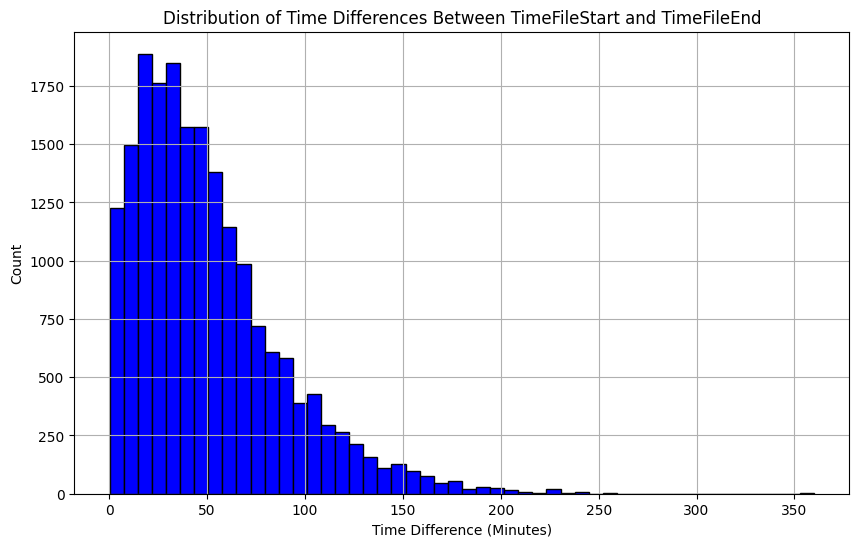

In [21]:
# Calculate time difference in minutes
df_filtered['TimeDifferenceMinutes'] = (df_filtered['TimeFileEnd'] - df_filtered['TimeFileStart']).dt.total_seconds() / 60

# Filter out negative time differences
df_filtered = df_filtered[df_filtered['TimeDifferenceMinutes'] >= 0]

# Display the first few rows to verify
print(df_filtered[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes']].head())

# Plot the time differences using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['TimeDifferenceMinutes'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Differences Between TimeFileStart and TimeFileEnd')
plt.grid(True)
plt.show()

            TimeFileStart         TimeFileEnd  TimeDifferenceMinutes
13773 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13774 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13775 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8
13808 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5
13809 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5


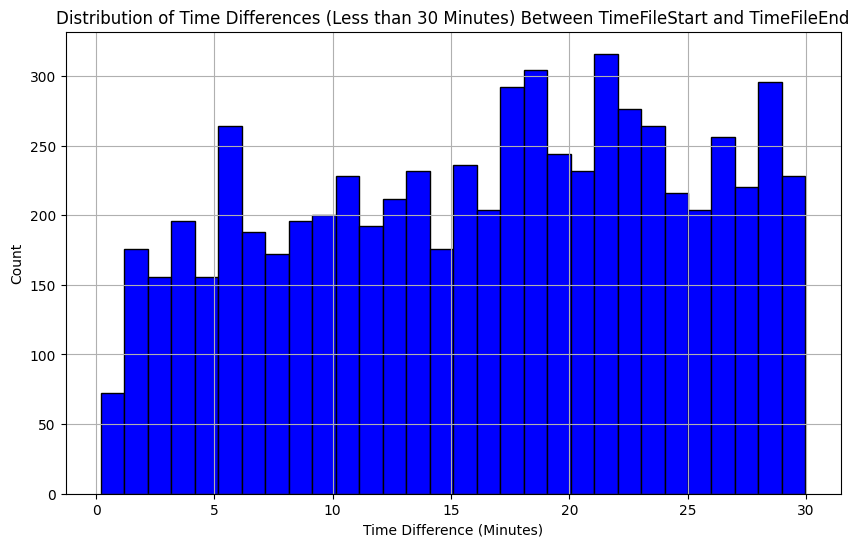

In [22]:
# Filter out time differences greater than or equal to 30 minutes
df_filtered_30mins = df_filtered[df_filtered['TimeDifferenceMinutes'] < 30]

# Display the first few rows to verify
print(df_filtered_30mins[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes']].head())

# Plot the time differences smaller than 30 minutes using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_30mins['TimeDifferenceMinutes'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Differences (Less than 30 Minutes) Between TimeFileStart and TimeFileEnd')
plt.grid(True)
plt.show()

### Categorized Time Periods

            TimeFileStart         TimeFileEnd  TimeDifferenceMinutes  \
13773 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8   
13774 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8   
13775 1900-01-01 16:30:00 1900-01-01 16:58:48                   28.8   
13808 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5   
13809 1900-01-01 17:39:00 1900-01-01 18:06:30                   27.5   

      TimeDifferenceCategory   CauseGroundDetail  
13773                  25-45  Defective Vehicles  
13774                  25-45  Defective Vehicles  
13775                  25-45  Defective Vehicles  
13808                  25-45           Accidents  
13809                  25-45           Accidents  


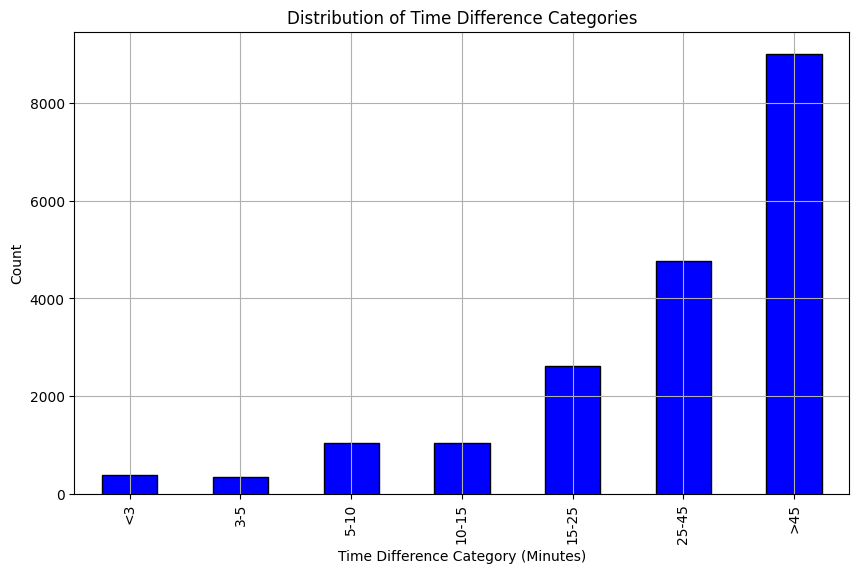

In [23]:
# Define categories for time differences
bins = [0, 3, 5, 10, 15, 25, 45, float('inf')]
labels = ['<3','3-5', '5-10','10-15', '15-25','25-45', '>45']
df_filtered['TimeDifferenceCategory'] = pd.cut(df_filtered['TimeDifferenceMinutes'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(df_filtered[['TimeFileStart', 'TimeFileEnd', 'TimeDifferenceMinutes', 'TimeDifferenceCategory', 'CauseGroundDetail']].head())

# Plot the distribution of time difference categories
category_counts = df_filtered['TimeDifferenceCategory'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Difference Categories')
plt.grid(True)
plt.show()

/var/folders/v0/xnj1kfbn0yj_ct6kts8mhvlm0000gn/T/ipykernel_42173/2612221324.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



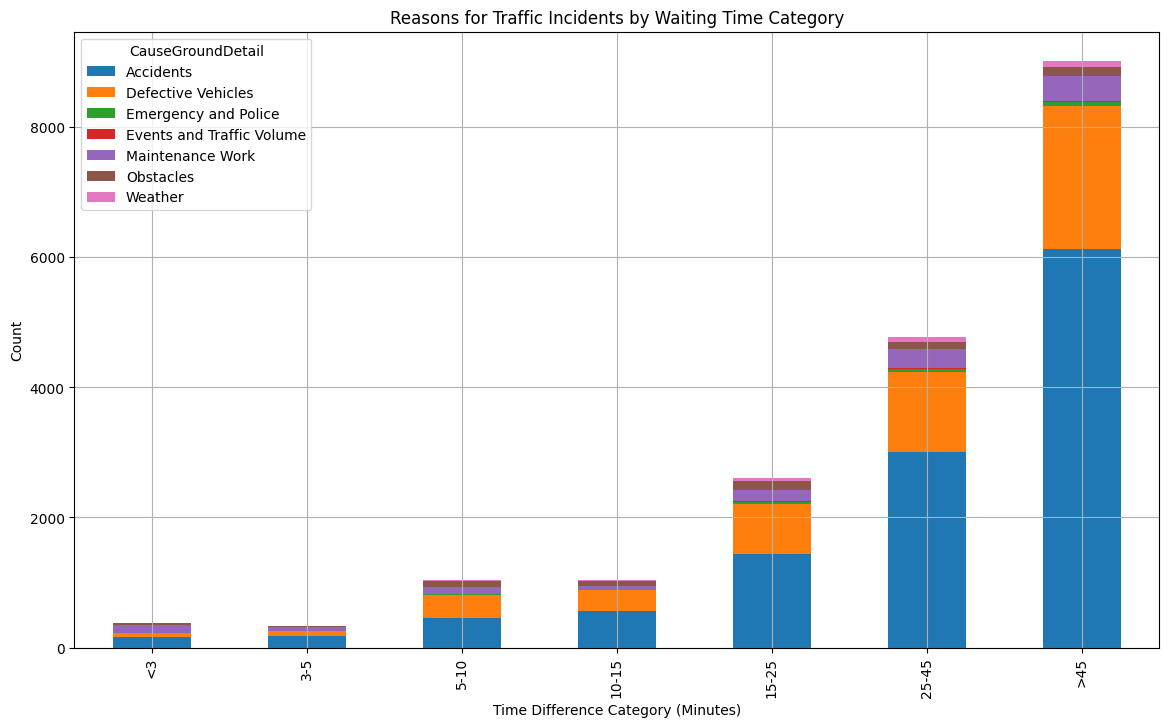

In [24]:
# Analyze the reasons (CauseGroundDetail) behind different time difference categories
reason_counts = df_filtered.groupby('TimeDifferenceCategory')['CauseGroundDetail'].value_counts().unstack().fillna(0)

# Plot the reasons for each time difference category
reason_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Reasons for Traffic Incidents by Waiting Time Category')
plt.legend(title='CauseGroundDetail')
plt.grid(True)
plt.show()

/var/folders/v0/xnj1kfbn0yj_ct6kts8mhvlm0000gn/T/ipykernel_42173/1611692534.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



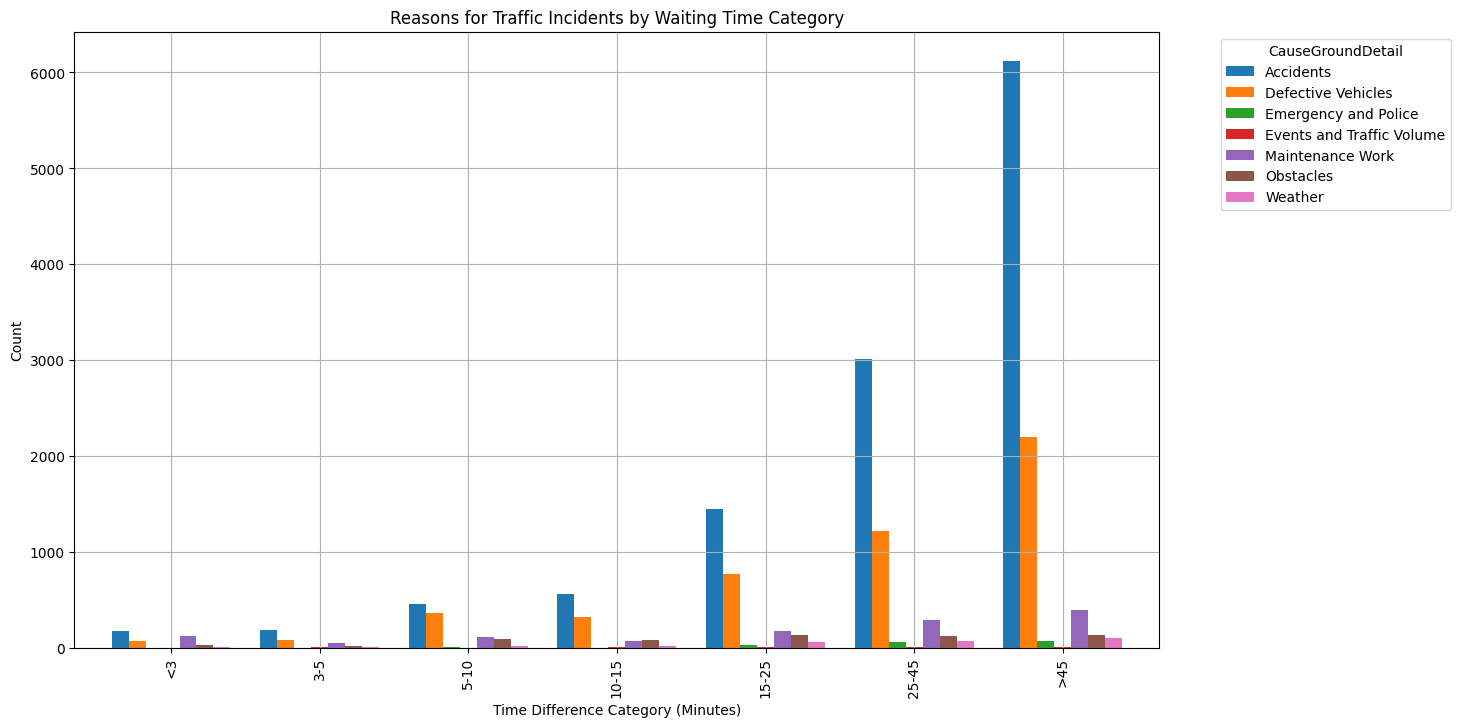

In [25]:
# Analyze the reasons (CauseGroundDetail) behind different time difference categories without 'Traffic Jams'
reason_counts_no_traffic_jams = df_filtered.groupby('TimeDifferenceCategory')['CauseGroundDetail'].value_counts().unstack().fillna(0)

# Plot the reasons for each time difference category without stacking and excluding 'Traffic Jams'
reason_counts_no_traffic_jams.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.xlabel('Time Difference Category (Minutes)')
plt.ylabel('Count')
plt.title('Reasons for Traffic Incidents by Waiting Time Category')
plt.legend(title='CauseGroundDetail', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

/var/folders/v0/xnj1kfbn0yj_ct6kts8mhvlm0000gn/T/ipykernel_42173/2670951375.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



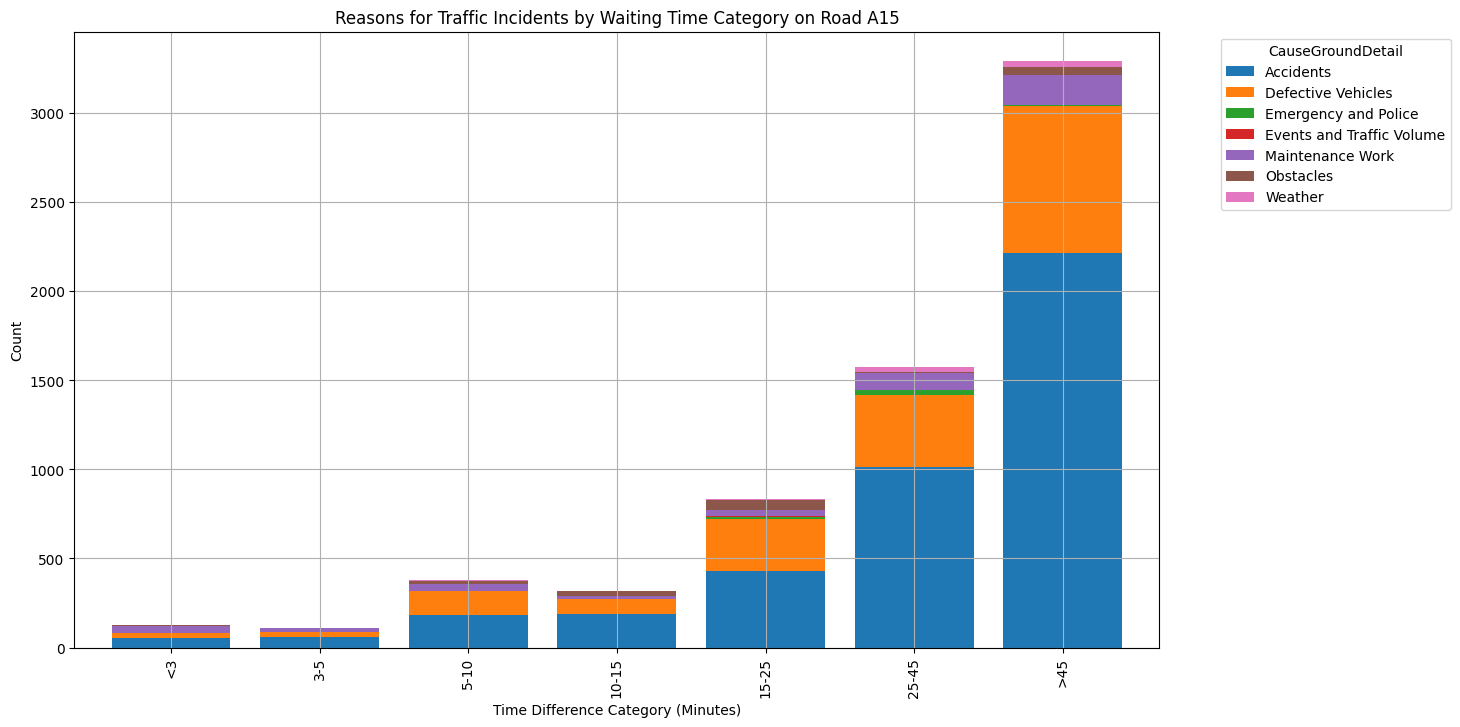

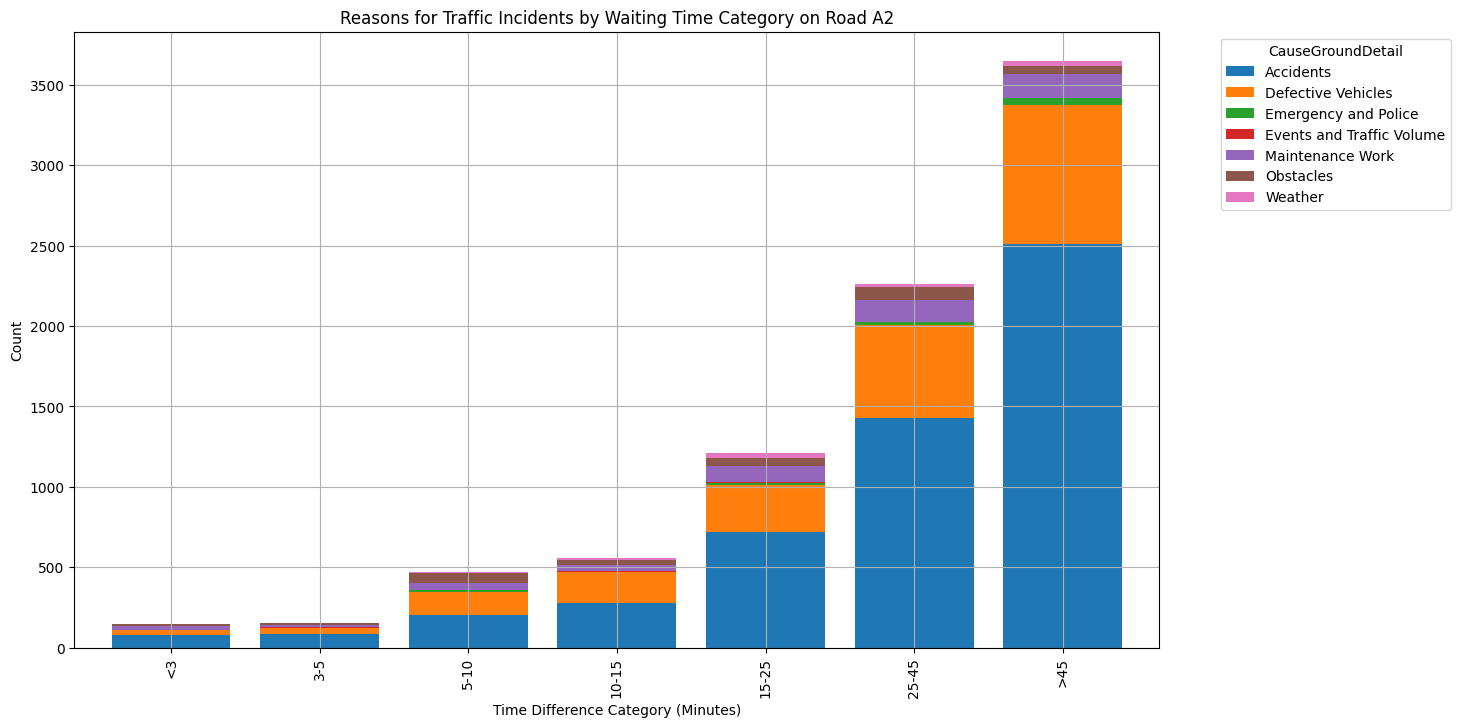

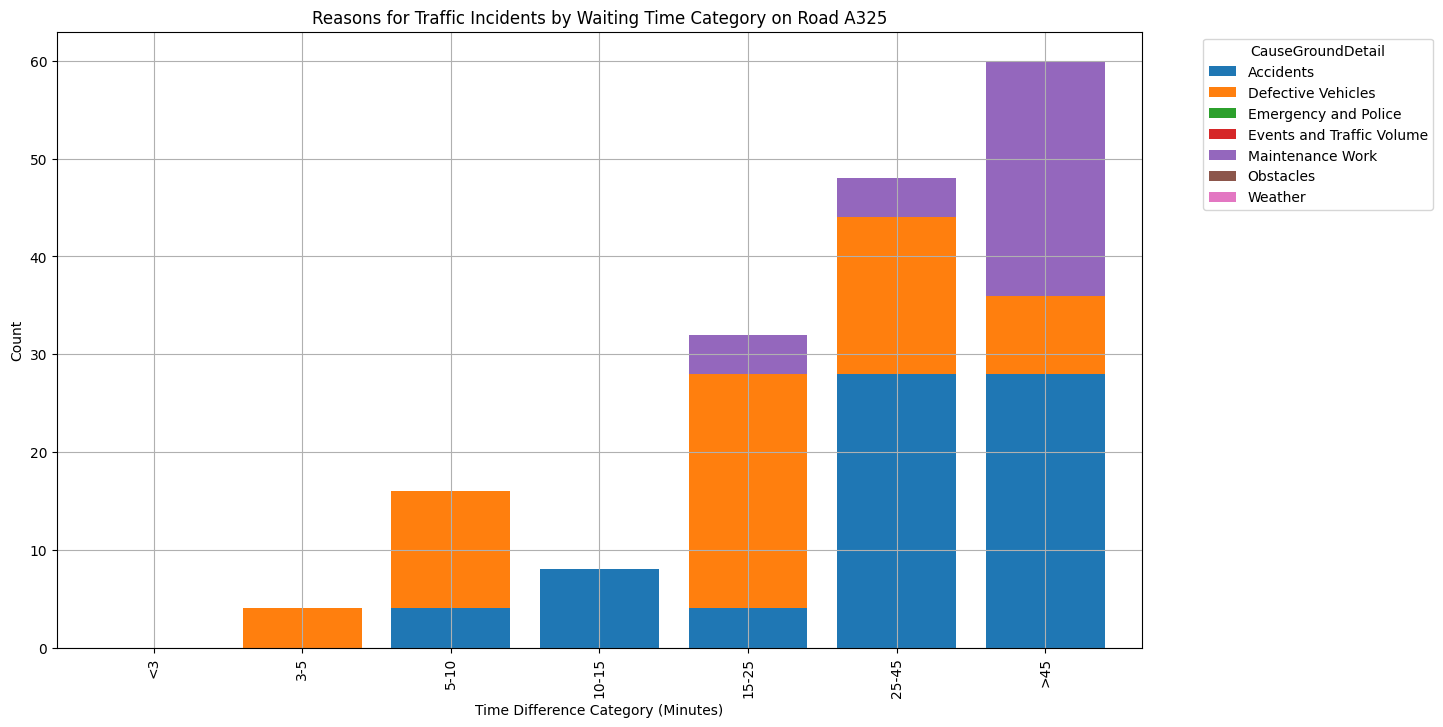

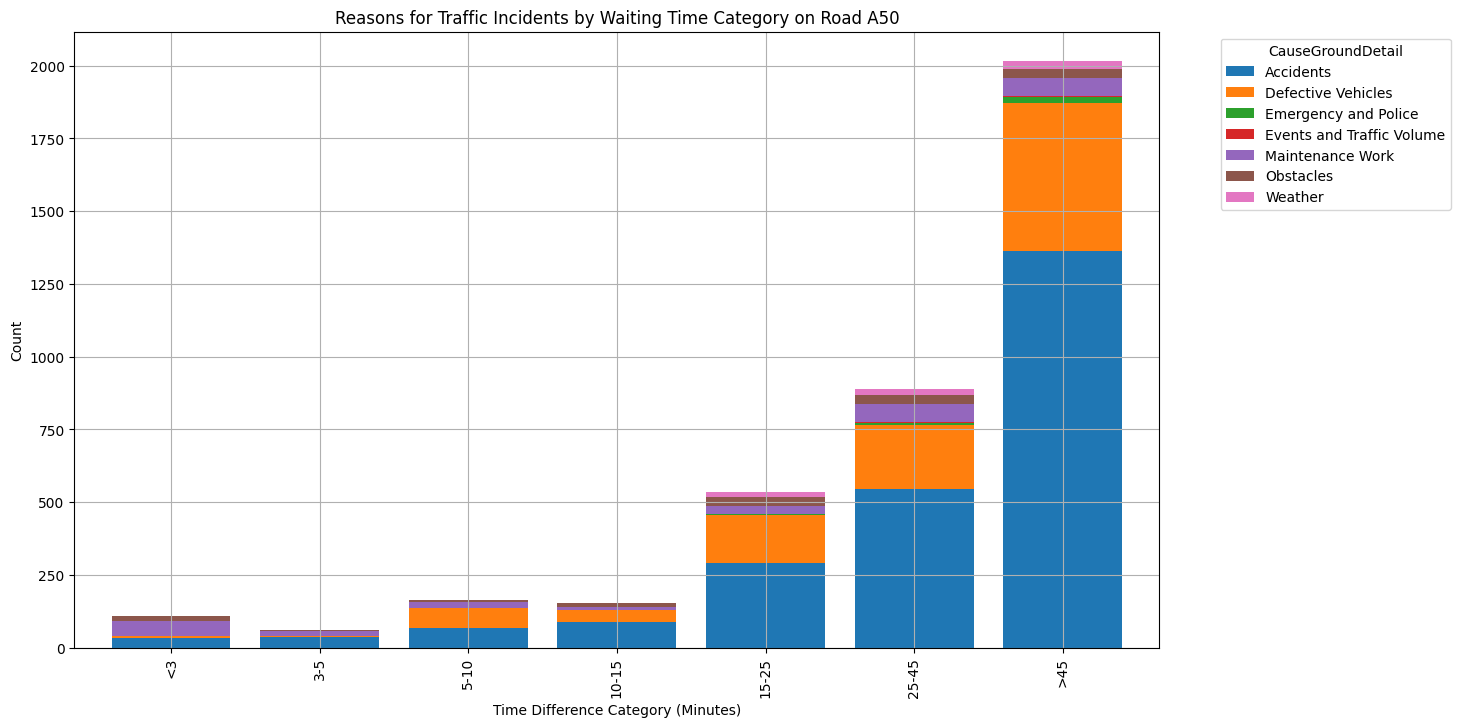

In [26]:
# Group by RoadOms and TimeDifferenceCategory, then count the causes
reason_counts_by_road = df_filtered.groupby(['RouteOms', 'TimeDifferenceCategory'])['CauseGroundDetail'].value_counts().unstack().fillna(0)

# Plot the reasons for each time difference category by road
for road in reason_counts_by_road.index.levels[0]:
    road_reason_counts = reason_counts_by_road.loc[road]
    fig, ax = plt.subplots(figsize=(14, 8))
    road_reason_counts.plot(kind='bar', stacked=True, ax=ax, width=0.8)
    plt.xlabel('Time Difference Category (Minutes)')
    plt.ylabel('Count')
    plt.title(f'Reasons for Traffic Incidents by Waiting Time Category on Road {road}')
    plt.legend(title='CauseGroundDetail', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [28]:
df_filtered.head()


,NLSituationNumber,DateFileStart,DateFileEnd,TimeFileStart,TimeFileEnd,FileSeverity,AvgLength,FileDuration,HectometerHead,HectometerTail,...,Thunder,IceFormation,datetime_y,TrafficSeverityNormalized,WeatherRelated,NonWeatherRelated,PrevWeatherRelated,NextNonWeatherRelated,TimeDifferenceMinutes,TimeDifferenceCategory
13773,2474048,2019-01-03,2019-03-01,1900-01-01 16:30:00,1900-01-01 16:58:48,"71,433","2,480,324","28,800","174,6","176,6",...,0.0,0.0,2019-01-03 16:00:00,0.071437,False,True,NaN,True,28.8,25-45
13774,2474048,2019-01-03,2019-03-01,1900-01-01 16:30:00,1900-01-01 16:58:48,"71,433","2,480,324","28,800","174,6","176,6",...,0.0,0.0,2019-01-03 16:00:00,0.071437,False,True,False,True,28.8,25-45
13775,2474048,2019-01-03,2019-03-01,1900-01-01 16:30:00,1900-01-01 16:58:48,"71,433","2,480,324","28,800","174,6","176,6",...,0.0,0.0,2019-01-03 16:00:00,0.071437,False,True,False,False,28.8,25-45
13808,2474065,2019-01-03,2019-03-01,1900-01-01 17:39:00,1900-01-01 18:06:30,"85,833","3,121,212","27,500","82,0","80,0",...,0.0,0.0,2019-01-03 17:00:00,0.085837,True,False,False,True,27.5,25-45
13809,2474065,2019-01-03,2019-03-01,1900-01-01 17:39:00,1900-01-01 18:06:30,"85,833","3,121,212","27,500","82,0","80,0",...,0.0,0.0,2019-01-03 17:00:00,0.085837,False,True,True,True,27.5,25-45


In [31]:
file_path = 'df_filtered.csv'
df_filtered.to_csv
df_filtered.to_csv(file_path, index=False)


In [33]:
import folium

# Coordinates for A2 highway in the Netherlands (some key points)
a2_coords = [
    (52.0894, 5.1073),  # Utrecht
    (51.9244, 4.4777),  # Rotterdam (end of A2)
    (51.4416, 5.4697),  # Eindhoven
    (50.8503, 5.6909)   # Maastricht (beginning of A2)
]

# Create a map centered around the midpoint of A2
map_a2 = folium.Map(location=[51.4416, 5.4697], zoom_start=7)

# Add the A2 highway path to the map
folium.PolyLine(a2_coords, color="blue", weight=2.5, opacity=1).add_to(map_a2)

# Add markers for the key points
for point in a2_coords:
    folium.Marker(location=point).add_to(map_a2)

# Display the map
map_a2.save('map_a2.html')

import IPython
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/map_a2.html" width="100%" height="500"></iframe>'))


/Users/dragiychev/Library/Python/3.12/lib/python/site-packages/IPython/core/display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



In [34]:
from IPython.display import HTML

# HTML code for the iframe
iframe_code = '''
<iframe width="425" height="350" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" src="https://onthegomap.com/?m=r&amp;u=km&amp;w%5B%5D=Routes+may+not+be+suitable+for+public+use.&amp;c%5B%5D=Route+data+%C2%A92024+On+The+Go+Map%2C+OpenStreetMap+Contributors&amp;d=26827&amp;f=cb76f9e3eb&amp;n=1&amp;dm=1&amp;context=embed&amp;r2=iygx9W_hW1ly2o60EEm5Cw14i128FALAH8DOB0~7k2l3o1f6c3ZCk6p1i1b3q1X9e4l6k2f5q1l6k1lAY1x7OX7Y1l2Ep2Gf5e1d6s1l1ER8~8u212XIy572e2gJL4~a1uCL4n2m1z1GjEy4r2Y1h1APEFO1W1Jq1HY1J8tY1i9n4fFo4gFx1OX2Gz1EF2rCi33A4GY1W2a2W8Ey1MW1E8EE6c1PBZ10Na19Or3Lb10b1DJJPd1V79FHOPW30GTr1b1n1x2f4Rl1Z9lDDMVW2j3uA56B0Z4z5NW1D2N7L0NC~1o1B4T1v1PB0~2k8X2u6n1c4x1m3BIv1_1LGVAp7e2b1Az16Z1Cl2Ur2i1X2W2f1o1h3q4FEFCJIv2u1p2Y1NARI545AJg1Ls1LOD62EBk24UOa23Y1Pe25S0E3m11u19k3Lw3D4h1u1t1AJ2Vi4Hq1Vo1d2a3Pq1~1s1FAZ1s1n1c33IAm12Y13W14U3E7C949O3K2Qw1m4Cu10a13I3GLo1JKHIHMPMp5y4JKPKl3W3HGLUVGp2Y2t2g2f1W1t1W1HCR8h1c1NG5CFC2E740U8Y1F8p2k1d1Y1RW1BUNs29a19e1HW214Nu1Jk15o11g10W1Eu2PW1n1a2d1Y19A56HIZ1OPAAm3r1CCY4f1CHENM4Ex1_1j3o378m1i3Oq34GW1_38i12IUKEE6CUa228d1i1e1h117TZ25BDDTJ9M76n14b1Eh3W2X1KTEf3Y2x2m1p5Y2v6_1n3MP4D4v2Eh1Kh2s1X2y1b1STIt1Qb2Ed11V3t1LP_3De1L0Bk15Md8l6Z4x2T9v1Tf1b1B45C0m1Bq1f3i8j3u8h1g3z3s9h1r1Rn1DEZ2m2Vt2Vr35D55t2FD370R5X10p1A3f1Ab5H6Lz6Dd57t19T7Vf1p47D7793fB6i1o2h1n2gB5A4888Eg1q4JEB335Rr2Ff2VZ7Dn65f1L7Ft45Z19Tb3x5HFj5r3X2z1l5Z2V6d1KRQj1u1JIl1Ql18n27BBZ2W2~LWMZ1W1FCd2Ub18d36z1Qn1Un1m1h1y1r1e3v3r3Vq1Hw1FW50UCS2Q1S7KFQd6g5j3e3n2c2h9w9le1qe1l1EHi17ElBmBt4w4rSoSl2o2Z6c6~9cAvAsAhBeBr29FA5E1G4w15SbNsN~GoIZ1Un2o1r2S~12p5Tr1En2g1l5g2RAd13RFZ2z1LX1DV3R9j15l19b1Pn1JTJk1X1m25CTY2DSTY2DW1La11Y15K9AJKy1e5i1w3y1e6e1c4Eq12I1I5Eb1e1b1m1d1e1r5Y6h3g3h7g7v6y6r1s1JET3789A9A0C1G7Gf1c1917L~7_756DE9AXAaAxGyGBW1BI5M1GHI78DEDE8MRSd1q1zEuEHSZ3_3l3y3NOp1s1f8m8r1u1t2Y3PQHMf4g4p6s6NODEVY1v1w1VUFIPOt2m2X1SLo1b7w6tVsVl3s3~4i53G0Q3KBU9852DCB8NId1Y1~4a5h3a3l2a3~3g3f1e1Ca12UCOm2o3g1c1g1UOe12K9Kk3s6Y3q5"></iframe><br/><small><a href="https://onthegomap.com" style="color:#0000FF;text-align:left" target="_blank">On The Go Map</a></small>
'''

# Display the iframe
HTML(iframe_code)


In [40]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import IPython.display

# Load the dataset
df = df_filtered
# Convert HectometerHead and HectometerTail to numeric values
df['HectometerHead'] = df['HectometerHead'].astype(str).str.replace(',', '.').astype(float)
df['HectometerTail'] = df['HectometerTail'].astype(str).str.replace(',', '.').astype(float)

# Define coordinates for key points along the A2 highway (simplified)
# This should ideally be more detailed and accurate
a2_coords = [
    (52.379189, 4.899431),  # Amsterdam
    (52.089444, 5.107798),  # Utrecht
    (51.441642, 5.469722),  # Eindhoven
    (50.851368, 5.690973)   # Maastricht
]

# Map hectometer values to these coordinates (simplified linear interpolation)
def hectometer_to_coords(hectometer):
    total_length = 200  # Assume the total length of A2 in hectometers
    amsterdam, utrecht, eindhoven, maastricht = a2_coords
    segments = [(0, 60, amsterdam, utrecht), (60, 120, utrecht, eindhoven), (120, 200, eindhoven, maastricht)]
    
    for start, end, start_coord, end_coord in segments:
        if start <= hectometer <= end:
            lat = start_coord[0] + (hectometer - start) / (end - start) * (end_coord[0] - start_coord[0])
            lon = start_coord[1] + (hectometer - start) / (end - start) * (end_coord[1] - start_coord[1])
            return [lat, lon]
    return [0, 0]  # Default return if hectometer is out of range

# Create heatmap data
heatmap_data = []
for _, row in df.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = hectometer_to_coords(mid_hectometer)
    heatmap_data.append(coord + [1])  # Adding a weight of 1 for each traffic jam

# Create a base map
m = folium.Map(location=[52.089444, 5.107798], zoom_start=7)

# Add heatmap layer
HeatMap(heatmap_data, radius=15).add_to(m)

# Save the map
m.save('heatmap_a2.html')

# Display the map
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/heatmap_a2.html" width="100%" height="500"></iframe>'))


/Users/dragiychev/Library/Python/3.12/lib/python/site-packages/IPython/core/display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



In [44]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import IPython.display

# Load the dataset
df = df_filtered


# Convert HectometerHead and HectometerTail to numeric values
df['HectometerHead'] = df['HectometerHead'].astype(str).str.replace(',', '.').astype(float)
df['HectometerTail'] = df['HectometerTail'].astype(str).str.replace(',', '.').astype(float)

# Sample detailed coordinates along the A2 highway
a2_coords = [
    (52.379189, 4.899431),  # Amsterdam
    (52.27122, 4.940576),   # Abcoude
    (52.090737, 5.12142),   # Utrecht
    (52.01998, 5.081658),   # Nieuwegein
    (51.993572, 5.091862),  # Vianen
    (51.958304, 5.22939),   # Culemborg
    (51.80944, 5.25154),    # Zaltbommel
    (51.697816, 5.303675),  # 's-Hertogenbosch
    (51.441642, 5.469722),  # Eindhoven
    (51.253402, 5.713991),  # Weert
    (50.851368, 5.690973)   # Maastricht
]

# Function to interpolate coordinates based on hectometer
def generate_a2_coordinates(hectometer):
    total_hectometers = 200
    index = int((hectometer / total_hectometers) * (len(a2_coords) - 1))
    index = max(0, min(index, len(a2_coords) - 1))  # Ensure index is within bounds
    return a2_coords[index]

# Create heatmap data
heatmap_data = []
for _, row in df.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = generate_a2_coordinates(mid_hectometer)
    heatmap_data.append([coord[0], coord[1], 1])  # Adding a weight of 1 for each traffic jam

# Create a base map
m = folium.Map(location=[52.089444, 5.107798], zoom_start=7)

# Add heatmap layer
HeatMap(heatmap_data, radius=15).add_to(m)

# Save the map
m.save('heatmap_a2.html')

# Display the map
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/heatmap_a2.html" width="100%" height="500"></iframe>'))


/Users/dragiychev/Library/Python/3.12/lib/python/site-packages/IPython/core/display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



In [45]:
import folium
import geopy.distance

# Key points along the A2 highway
a2_coords = [
    (52.379189, 4.899431),  # Amsterdam
    (52.27122, 4.940576),   # Abcoude
    (52.090737, 5.12142),   # Utrecht
    (52.01998, 5.081658),   # Nieuwegein
    (51.993572, 5.091862),  # Vianen
    (51.958304, 5.22939),   # Culemborg
    (51.80944, 5.25154),    # Zaltbommel
    (51.697816, 5.303675),  # 's-Hertogenbosch
    (51.441642, 5.469722),  # Eindhoven
    (51.253402, 5.713991),  # Weert
    (50.851368, 5.690973)   # Maastricht
]

# Function to find the exact km point along the A2
def find_km_point(coords, km_point, total_km=217):
    distance_covered = 0
    for i in range(len(coords) - 1):
        start = coords[i]
        end = coords[i + 1]
        segment_distance = geopy.distance.distance(start, end).km
        if distance_covered + segment_distance >= km_point:
            fraction = (km_point - distance_covered) / segment_distance
            lat = start[0] + fraction * (end[0] - start[0])
            lon = start[1] + fraction * (end[1] - start[1])
            return (lat, lon)
        distance_covered += segment_distance
    return coords[-1]  # Return the last point if km_point exceeds the total distance

# Find the location of the 105th km
km_105_location = find_km_point(a2_coords, 105)

# Create a map and add a marker for the 105th km point
m = folium.Map(location=[52.089444, 5.107798], zoom_start=7)
folium.Marker(km_105_location, popup='105th km on A2 Highway', icon=folium.Icon(color='red')).add_to(m)

# Save the map
m.save('km_105_a2.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/km_105_a2.html" width="100%" height="500"></iframe>'))


In [46]:
import folium

# Coordinates extracted from the Google Maps link (assuming you manually found them as the link itself does not provide direct coordinates)
coords = (51.946470, 5.292160)  # Example coordinates from the given link

# Create a map centered around the extracted coordinates
m = folium.Map(location=coords, zoom_start=15)

# Add a marker for the specific location
folium.Marker(coords, popup='Location from Google Maps link', icon=folium.Icon(color='blue')).add_to(m)

# Save the map
m.save('visualized_location.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/visualized_location.html" width="100%" height="500"></iframe>'))


In [50]:
import folium

# List of coordinates
coordinates = [
    (51.312405, 5.616699), (51.313074, 5.606115), (51.333598, 5.580849), (51.348254, 5.543909),
    (51.403406, 5.500356), (51.405741, 5.433465), (51.448071, 5.427350), (51.458836, 5.410217),
    (51.481279, 5.404994), (51.497686, 5.474670), (51.524508, 5.469139), (51.540660, 5.482967),
    (51.564830, 5.474209), (51.598436, 5.511544), (51.609696, 5.506320), (51.619284, 5.501788),
    (51.631302, 5.515846), (51.639265, 5.575151), (51.653279, 5.599580), (51.677247, 5.598121),
    (51.692678, 5.578071), (51.717100, 5.568852), (51.740843, 5.585215), (51.752877, 5.621013),
    (51.780926, 5.639066), (51.806108, 5.676631), (51.835833, 5.687463), (51.877112, 5.733786),
    (51.895178, 5.745002), (51.913804, 5.771582), (51.958160, 5.764745), (51.967248, 5.769047),
    (51.974945, 5.766314), (51.975606, 5.773610), (51.982373, 5.776614), (51.988156, 5.817253),
    (51.986717, 5.822316), (51.985292, 5.864351), (51.983288, 5.869232), (51.983470, 5.881285),
    (51.985714, 5.891817), (51.984686, 5.894893)
]

# Create a map centered around the middle of the coordinates
midpoint = coordinates[len(coordinates) // 2]
m = folium.Map(location=midpoint, zoom_start=10)

# Add a polyline to the map
folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=1).add_to(m)

# Save the map
m.save('line_through_coordinates.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/line_through_coordinates.html" width="100%" height="500"></iframe>'))


In [59]:
import folium

# List of coordinates for the first line
coordinates1 = [
    (51.312405, 5.616699), (51.313074, 5.606115), (51.333598, 5.580849), (51.348254, 5.543909),
    (51.403406, 5.500356), (51.405741, 5.433465), (51.448071, 5.427350), (51.458836, 5.410217),
    (51.481279, 5.404994), (51.486389, 5.420365), (51.493039, 5.438567), (51.497686, 5.474670), (51.524508, 5.469139), (51.540660, 5.482967),
    (51.564830, 5.474209), (51.598436, 5.511544), (51.609696, 5.506320), (51.619284, 5.501788),
    (51.631302, 5.515846), (51.639265, 5.575151), (51.653279, 5.599580), (51.677247, 5.598121),
    (51.692678, 5.578071), (51.717100, 5.568852), (51.740843, 5.585215), (51.752877, 5.621013),
    (51.780926, 5.639066), (51.806108, 5.676631), (51.835833, 5.687463), (51.877112, 5.733786),
    (51.895178, 5.745002), (51.913804, 5.771582), (51.958160, 5.764745), (51.967248, 5.769047),
    (51.974945, 5.766314), (51.975606, 5.773610), (51.982373, 5.776614), (51.988156, 5.817253),
    (51.986717, 5.822316), (51.985292, 5.864351), (51.983288, 5.869232), (51.983470, 5.881285),
    (51.985714, 5.891817), (51.984686, 5.894893)
]

# List of coordinates for the second line (with a slight offset)
offset = 0.001
coordinates2 = [
    (51.312405 + offset, 5.616699 + offset), (51.313074 + offset, 5.606115 + offset), (51.333598 + offset, 5.580849 + offset), 
    (51.348254 + offset, 5.543909 + offset), (51.403406 + offset, 5.500356 + offset), (51.405741 + offset, 5.433465 + offset), 
    (51.448071 + offset, 5.427350 + offset), (51.458836 + offset, 5.410217 + offset), (51.481279 + offset, 5.404994 + offset), 
    (51.491549 + offset, 5.430055 + offset), (51.560574 + offset, 5.357727 + offset), (51.584622 + offset, 5.355263 + offset), 
    (51.612941 + offset, 5.319036 + offset), (51.662497 + offset, 5.304250 + offset), (51.672496 + offset, 5.294539 + offset), 
    (51.672219 + offset, 5.292692 + offset), (51.682503 + offset, 5.294246 + offset), (51.683920 + offset, 5.293939 + offset), 
    (51.684470 + offset, 5.293101 + offset), (51.688310 + offset, 5.295762 + offset), (51.693087 + offset, 5.297097 + offset), 
    (51.692865 + offset, 5.297734 + offset)
]

# Create a map centered around the midpoint of the first set of coordinates
midpoint = coordinates1[len(coordinates1) // 2]
m = folium.Map(location=midpoint, zoom_start=10)

# Add the first polyline to the map
folium.PolyLine(coordinates1, color="blue", weight=2.5, opacity=1).add_to(m)

# Add the second polyline to the map
folium.PolyLine(coordinates2, color="red", weight=2.5, opacity=1).add_to(m)

# Save the map
m.save('line_through_coordinates_final.html')

# Display the map
import IPython.display
IPython.display.display(IPython.display.HTML('<iframe src="/mnt/data/line_through_coordinates.html" width="100%" height="500"></iframe>'))


In [55]:
import pandas as pd

# Load the dataset
df = df_filtered

# Define the hectometer ranges for A2 and A50
a2_range = (121.4, 182.5)
a50_range = (93.5, 162.2)

# Filter the dataset
def filter_hectometers(df, route_num, min_km, max_km):
    filtered_df = df[(df['RouteNum'] == route_num) & 
                     (((df['HectometerHead'] >= min_km) & (df['HectometerHead'] <= max_km)) |
                      ((df['HectometerTail'] >= min_km) & (df['HectometerTail'] <= max_km)) |
                      ((df['HectometerHead'] <= min_km) & (df['HectometerTail'] >= max_km)))]
    return filtered_df

# Apply filtering
df_filtered_a2 = filter_hectometers(df, 2, a2_range[0], a2_range[1])
df_filtered_a50 = filter_hectometers(df, 50, a50_range[0], a50_range[1])

# Combine the filtered data
df_filtered_combined = pd.concat([df_filtered_a2, df_filtered_a50])

df_filtered_combined.head()
file_path = 'df_filtered_combined.csv'
df_filtered_combined.to_csv
df_filtered_combined.to_csv(file_path, index=False)


In [56]:
df_filtered_combined.info

<bound method DataFrame.info of        NLSituationNumber DateFileStart DateFileEnd       TimeFileStart  \
13773            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13774            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13775            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13772            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13780            2474152    2019-01-04  2019-04-01 1900-01-01 17:31:00   
...                  ...           ...         ...                 ...   
5134             3961818    2024-02-27  2024-02-27 1900-01-01 16:28:30   
5133             3961818    2024-02-27  2024-02-27 1900-01-01 16:28:30   
5132             3961818    2024-02-27  2024-02-27 1900-01-01 16:28:30   
5148             3960941    2024-02-27  2024-02-27 1900-01-01 08:34:30   
5127             3961733    2024-02-27  2024-02-27 1900-01-01 16:18:30   

              TimeFileEnd FileSeverity  AvgLength FileDuration  \
13773 1900-01

In [57]:
df_filtered.info

<bound method DataFrame.info of        NLSituationNumber DateFileStart DateFileEnd       TimeFileStart  \
13773            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13774            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13775            2474048    2019-01-03  2019-03-01 1900-01-01 16:30:00   
13808            2474065    2019-01-03  2019-03-01 1900-01-01 17:39:00   
13809            2474065    2019-01-03  2019-03-01 1900-01-01 17:39:00   
...                  ...           ...         ...                 ...   
5105             3965932    2024-02-29  2024-02-29 1900-01-01 16:29:30   
5104             3965932    2024-02-29  2024-02-29 1900-01-01 16:29:30   
5111             3966118    2024-02-29  2024-02-29 1900-01-01 16:50:30   
5142             3964826    2024-02-29  2024-02-29 1900-01-01 08:37:30   
5108             3966118    2024-02-29  2024-02-29 1900-01-01 16:50:30   

              TimeFileEnd FileSeverity  AvgLength FileDuration  \
13773 1900-01

In [65]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
df = df_filtered

# Convert HectometerHead and HectometerTail to numeric values
df['HectometerHead'] = df['HectometerHead'].astype(str).str.replace(',', '.').astype(float)
df['HectometerTail'] = df['HectometerTail'].astype(str).str.replace(',', '.').astype(float)

# Define the hectometer ranges for A2 and A50
a2_range = (121.4, 182.5)
a50_range = (93.5, 162.2)

# Filter the dataset
def filter_hectometers(df, route_num, min_km, max_km):
    filtered_df = df[(df['RouteNum'] == route_num) & 
                     (((df['HectometerHead'] >= min_km) & (df['HectometerHead'] <= max_km)) |
                      ((df['HectometerTail'] >= min_km) & (df['HectometerTail'] <= max_km)) |
                      ((df['HectometerHead'] <= min_km) & (df['HectometerTail'] >= max_km)))]
    return filtered_df

# Apply filtering
df_filtered_a2 = filter_hectometers(df, 2, a2_range[0], a2_range[1])
df_filtered_a50 = filter_hectometers(df, 50, a50_range[0], a50_range[1])

# Define the coordinates for the polylines
coordinates_a2 = [
    (51.312405, 5.616699), (51.313074, 5.606115), (51.333598, 5.580849), (51.348254, 5.543909),
    (51.403406, 5.500356), (51.405741, 5.433465), (51.448071, 5.427350), (51.458836, 5.410217),
    (51.481279, 5.404994), (51.486389, 5.420365), (51.493039, 5.438567), (51.497686, 5.474670), 
    (51.524508, 5.469139), (51.540660, 5.482967), (51.564830, 5.474209), (51.598436, 5.511544), 
    (51.609696, 5.506320), (51.619284, 5.501788), (51.631302, 5.515846), (51.639265, 5.575151), 
    (51.653279, 5.599580), (51.677247, 5.598121), (51.692678, 5.578071), (51.717100, 5.568852), 
    (51.740843, 5.585215), (51.752877, 5.621013), (51.780926, 5.639066), (51.806108, 5.676631), 
    (51.835833, 5.687463), (51.877112, 5.733786), (51.895178, 5.745002), (51.913804, 5.771582), 
    (51.958160, 5.764745), (51.967248, 5.769047), (51.974945, 5.766314), (51.975606, 5.773610), 
    (51.982373, 5.776614), (51.988156, 5.817253), (51.986717, 5.822316), (51.985292, 5.864351), 
    (51.983288, 5.869232), (51.983470, 5.881285), (51.985714, 5.891817), (51.984686, 5.894893)
]

offset = 0.001
coordinates_a50 = [
    (51.312405 + offset, 5.616699 + offset), (51.313074 + offset, 5.606115 + offset), 
    (51.333598 + offset, 5.580849 + offset), (51.348254 + offset, 5.543909 + offset), 
    (51.403406 + offset, 5.500356 + offset), (51.405741 + offset, 5.433465 + offset), 
    (51.448071 + offset, 5.427350 + offset), (51.458836 + offset, 5.410217 + offset), 
    (51.481279 + offset, 5.404994 + offset), (51.491549 + offset, 5.430055 + offset), 
    (51.560574 + offset, 5.357727 + offset), (51.584622 + offset, 5.355263 + offset), 
    (51.612941 + offset, 5.319036 + offset), (51.662497 + offset, 5.304250 + offset), 
    (51.672496 + offset, 5.294539 + offset), (51.672219 + offset, 5.292692 + offset), 
    (51.682503 + offset, 5.294246 + offset), (51.683920 + offset, 5.293939 + offset), 
    (51.684470 + offset, 5.293101 + offset), (51.688310 + offset, 5.295762 + offset), 
    (51.693087 + offset, 5.297097 + offset), (51.692865 + offset, 5.297734 + offset)
]

# Function to map hectometer to coordinates proportionally
def map_hectometer_to_coords(hectometer, coordinates, min_hectometer, max_hectometer):
    proportion = (hectometer - min_hectometer) / (max_hectometer - min_hectometer)
    index = int(proportion * (len(coordinates) - 1))
    index = min(max(index, 0), len(coordinates) - 1)  # Clamp index within bounds
    print(f"Hectometer: {hectometer}, Proportion: {proportion}, Index: {index}")  # Debugging statement
    return coordinates[index]

# Create heatmap data for A2
heatmap_data_a2 = []
for _, row in df_filtered_a2.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = map_hectometer_to_coords(mid_hectometer, coordinates_a2, a2_range[0], a2_range[1])
    heatmap_data_a2.append([coord[0], coord[1], 1])  # Adding a weight of 1 for each traffic jam

# Create heatmap data for A50
heatmap_data_a50 = []
for _, row in df_filtered_a50.iterrows():
    mid_hectometer = (row['HectometerHead'] + row['HectometerTail']) / 2
    coord = map_hectometer_to_coords(mid_hectometer, coordinates_a50, a50_range[0], a50_range[1])
    heatmap_data_a50.append([coord[0], coord[1], 1])  # Adding a weight of 1 for each traffic jam

# Create a map centered around the midpoint of the first set of coordinates
midpoint = coordinates_a2[len(coordinates_a2) // 2]
m = folium.Map(location=midpoint, zoom_start=10)

# Add the polylines to the map
folium.PolyLine(coordinates_a2, color="red", weight=2.5, opacity=1).add_to(m)
folium.PolyLine(coordinates_a50, color="blue", weight=2.5, opacity=1).add_to(m)

# Add heatmap layers
HeatMap(heatmap_data_a2, radius=15, gradient={0.4: 'lime', 0.65: 'orange', 1: 'red'}).add_to(m)
HeatMap(heatmap_data_a50, radius=15, gradient={0.4: 'blue', 0.65: 'cyan', 1: 'purple'}).add_to(m)

m.save('heatmap_a2_a50.html')


Hectometer: 175.6, Proportion: 0.8870703764320784, Index: 38
Hectometer: 175.6, Proportion: 0.8870703764320784, Index: 38
Hectometer: 175.6, Proportion: 0.8870703764320784, Index: 38
Hectometer: 175.6, Proportion: 0.8870703764320784, Index: 38
Hectometer: 165.7, Proportion: 0.725040916530278, Index: 31
Hectometer: 164.7, Proportion: 0.708674304418985, Index: 30
Hectometer: 164.7, Proportion: 0.708674304418985, Index: 30
Hectometer: 164.7, Proportion: 0.708674304418985, Index: 30
Hectometer: 165.7, Proportion: 0.725040916530278, Index: 31
Hectometer: 165.7, Proportion: 0.725040916530278, Index: 31
Hectometer: 165.7, Proportion: 0.725040916530278, Index: 31
Hectometer: 164.7, Proportion: 0.708674304418985, Index: 30
Hectometer: 174.8, Proportion: 0.8739770867430444, Index: 37
Hectometer: 174.8, Proportion: 0.8739770867430444, Index: 37
Hectometer: 174.8, Proportion: 0.8739770867430444, Index: 37
Hectometer: 174.8, Proportion: 0.8739770867430444, Index: 37
Hectometer: 151.5, Proportion: 0